  ## MSN 514 HW:9



  ### Erinç Ada Ceylan 22101844

In [1]:
# Simulation Parameters:
# N       – grid size (N x N)
# T_warm  – warm-up steps to reach criticality
# T_run   – steps to record avalanche statistics
# S_max   – max avalanche size to count in histogram

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def topple_vn(state, i, j):
    N = state.shape[0]
    avalanche = np.zeros_like(state)
    to_check = [(i, j)]
    state[i, j] += 1
    count = 0

    while to_check:
        new_sites = []
        for x, y in to_check:
            if state[x, y] > 3:
                count += 1
                avalanche[x, y] += 1
                state[x, y] -= 4
                for dx, dy in ((1,0),(-1,0),(0,1),(0,-1)):
                    nx, ny = x+dx, y+dy
                    if 0 <= nx < N and 0 <= ny < N:
                        state[nx, ny] += 1
                        new_sites.append((nx, ny))
        to_check = new_sites
    return state, avalanche, count


def topple_moore(state, i, j):
    N = state.shape[0]
    avalanche = np.zeros_like(state)
    to_check = [(i, j)]
    state[i, j] += 1
    count = 0

    moore_dirs = [(dx, dy) for dx in (-1,0,1) for dy in (-1,0,1) # adding diagonal neighbors
                  if not (dx == 0 and dy == 0)]

    while to_check:
        new_sites = []
        for x, y in to_check:
            if state[x, y] > 7:
                count += 1
                avalanche[x, y] += 1
                state[x, y] -= 8
                for dx, dy in moore_dirs:
                    nx, ny = x+dx, y+dy
                    if 0 <= nx < N and 0 <= ny < N:
                        state[nx, ny] += 1
                        new_sites.append((nx, ny))
        to_check = new_sites
    return state, avalanche, count



  ### (i) Original Model Analysis

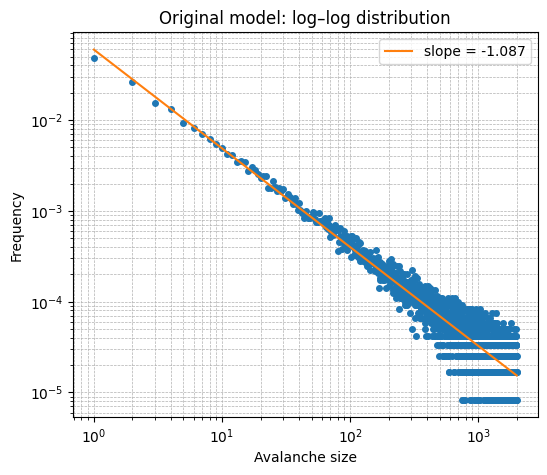

Original model slope: -1.0873


In [3]:
np.random.seed(42)
N = 200
T_warm, T_run = 30000, 120000
S_max = 2000

# Initialize the state
state = np.random.randint(0, 4, size=(N, N))
warm_sites = np.random.randint(1, N-1, size=(T_warm, 2))
for i, j in warm_sites:
    state, _, _ = topple_vn(state, i, j)

# Measure avalanches
sizes = np.zeros(S_max, int)
run_sites = np.random.randint(1, N-1, size=(T_run, 2))
for i, j in run_sites:
    state, avalanche, count = topple_vn(state, i, j)
    if 0 < count < S_max:
        sizes[count] += 1

# Log–log plot and slope
freq = sizes / T_run
valid = np.where(freq[1:] > 0)[0] + 1
log_s, log_f = np.log(valid), np.log(freq[valid])
slope_orig, intercept = np.polyfit(log_s, log_f, 1)

plt.figure(figsize=(6,5))
plt.loglog(valid, freq[valid], 'o', markersize=4)
plt.plot(valid, np.exp(intercept + slope_orig*log_s),
         '-', label=f"slope = {slope_orig:.3f}")
plt.xlabel("Avalanche size")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.title("Original model: log–log distribution")
plt.show()

print(f"Original model slope: {slope_orig:.4f}")



  ### (ii) Moore Model Analysis

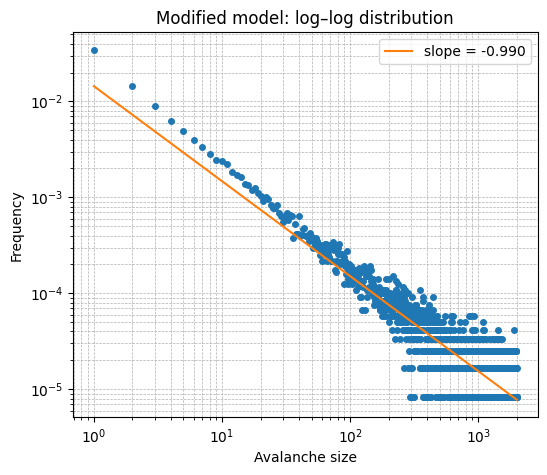

Modified model slope: -0.9900


In [4]:
# Initialize the modified state
np.random.seed(24)
state2 = np.random.randint(0, 8, size=(N, N))
warm_sites2 = np.random.randint(1, N-1, size=(T_warm, 2))
for i, j in warm_sites2:
    state2, _, _ = topple_moore(state2, i, j)

# Record avalanche sizes during measurement phase
sizes2 = np.zeros(S_max, int)
run_sites2 = np.random.randint(1, N-1, size=(T_run, 2))
for i, j in run_sites2:
    state2, avalanche2, count2 = topple_moore(state2, i, j)
    if 0 < count2 < S_max:
        sizes2[count2] += 1

# Log–log plot and slope
freq2 = sizes2 / T_run
valid2 = np.where(freq2[1:] > 0)[0] + 1 
log_s2, log_f2 = np.log(valid2), np.log(freq2[valid2])
slope_mod, intercept2 = np.polyfit(log_s2, log_f2, 1)
plt.figure(figsize=(6,5))
plt.loglog(valid2, freq2[valid2], 'o', markersize=4)
plt.plot(valid2, np.exp(intercept2 + slope_mod*log_s2),
         '-', label=f"slope = {slope_mod:.3f}")
plt.xlabel("Avalanche size")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.title("Modified model: log–log distribution")
plt.show()

print(f"Modified model slope: {slope_mod:.4f}")


  ### Extra: Final State & Real‑time Avalanches

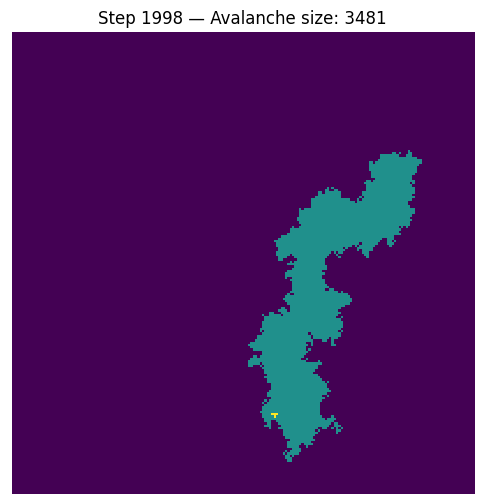

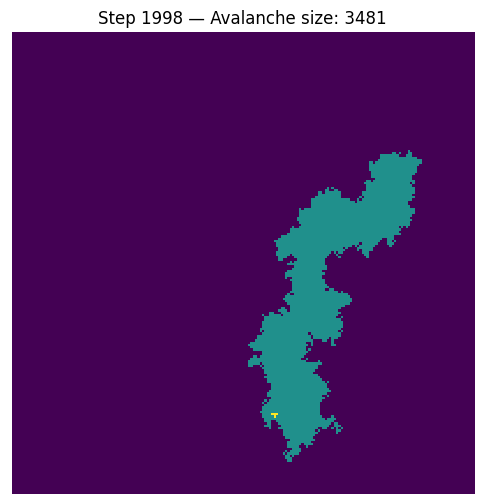

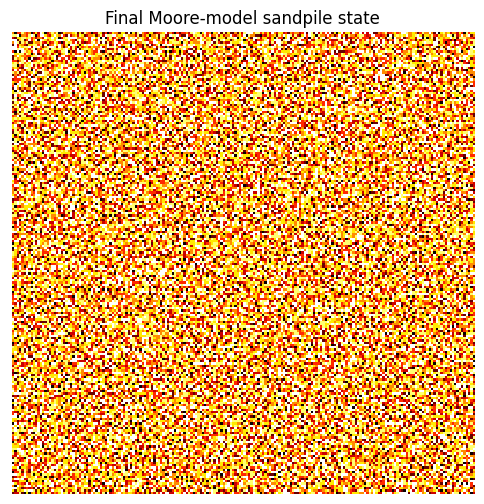

In [5]:
from IPython.display import clear_output, display
import time
import matplotlib.pyplot as plt
import numpy as np


# Real Time Avalanche Visualization
plt.ion()
fig, ax = plt.subplots(figsize=(6, 6))

T_vis = 2000
vis_sites = np.random.randint(1, N-1, size=(T_vis, 2))

for step, (i, j) in enumerate(vis_sites, start=1):
    state2, avalanche_vis, _ = topple_moore(state2, i, j)
    if avalanche_vis.sum() > 0:
        clear_output(wait=True)
        ax.clear()
        ax.imshow(avalanche_vis, cmap='viridis', interpolation='nearest', vmin=0)
        ax.axis('equal')
        ax.axis('off')
        ax.set_title(f"Step {step} — Avalanche size: {int(avalanche_vis.sum())}")
        display(fig)
        time.sleep(0.03)
plt.ioff()

# Final State Visualization
plt.figure(figsize=(6, 6))
plt.imshow(state2, cmap='hot', interpolation='nearest')
plt.axis('equal')
plt.axis('off')
plt.title("Final Moore‑model sandpile state")
plt.show()

